## 06 비지도 학습

# 06-1 군집 알고리즘

# 비지도 학습 Unsupervised learning
타깃이 없을 때 사용하는 머신러닝 알고리즘

과제 : 사진 데이터로 사과, 바나나, 파인애플 분류하기

1. 픽셀값 평균 사용


In [17]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-11-08 22:06:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11, 64:ff9b::43c7:f80a, ...
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-08 22:06:19--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247, 64:ff9b::14c8:f5f7
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-08 22:06:19--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.git

사과, 바나나, 파인애플을 담고 있는 흑백 사진
[해당 데이터 셋] [https://www.kaggle.com/moltean/fruits]

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
fruits = np.load('fruits_300.npy')

In [20]:
print(fruits.shape)

(300, 100, 100)


첫 번째 차원 : 샘플의 개수
두 번째 차원 : 이미지 높이
세 번째 차원 : 이미지 너비

In [21]:
print(fruits[0,0,:])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


첫 번째 이미지의 첫 번째 행 출력 -> 3차원 배열이기 때문에 처음 2개의 인덱스 = 0, 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자 (:)

첫 번째 행에 있는 픽셀 100개 출력됨
흑백 사진 픽셀 : 0~255의 정숫값을 가짐


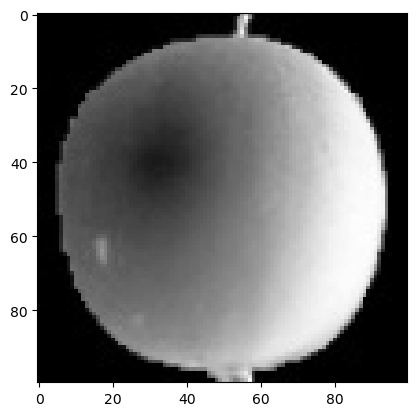

In [22]:
plt.imshow(fruits[0], cmap='gray')
plt.show()

fruits에 저장된 첫 번째 이미지 출력 -> plt.imshow(fruits[0])
흑백 이미지 : cmap='gray'
0에 가까울수록 어둡게 / 높은 값은 밝게

우리의 관심 대상은 사과 -> 이미지를 넘파일 배열로 변환할 때 **반전**시킴
**바탕은 검게, 대상은 밝게**

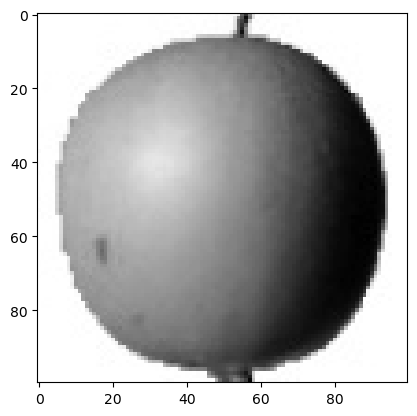

In [23]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

cmap='gray_r' : 이미지를 다시 반점함

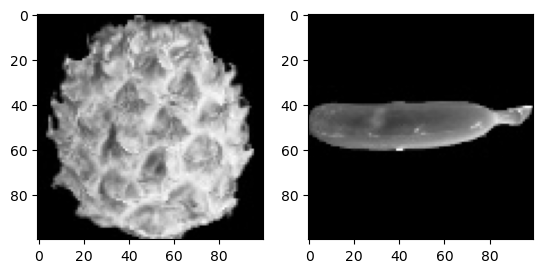

In [24]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray')
axs[1].imshow(fruits[200], cmap='gray')
plt.show()

plt.subplot() : 여러 개의 그래프를 한 figure 안에 만들 때 사용
ex) plt.subplot(1,2) -> 1행 2열, 즉 그림을 2개 나란히 배치
    axs[0] : 왼쪽 그림
    axs[1] : 오른쪽 그림

In [25]:
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[101:200].reshape(-1,100*100)
banana = fruits[201:300].reshape(-1,100*100)

100*100 이미지를 펼쳐서 10000 인 1차원 배열로 변경 -> 배열을 계산할 때 편리
-1 : 자동으로 남은 차원을 할당 (기존 값을 할당)

In [26]:
print(apple.shape)

(100, 10000)


In [27]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


**histogram**을 그려서 평균값이 어떻게 분포되어 있는지 알아보자

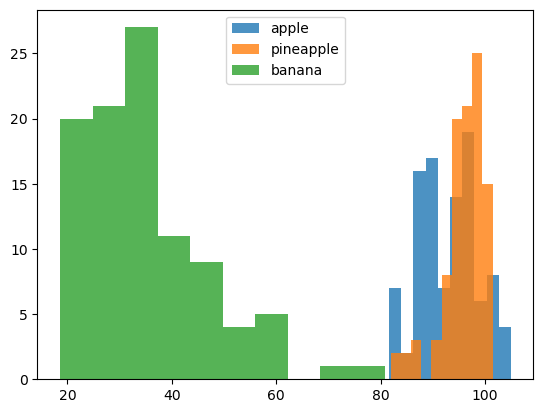

In [28]:
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')
plt.legend()
plt.show()

alpha : 투명도 -> 조금 낮추면 겹치는 부분 확인 가능
legend() : 범례

graph 해석
- 바나나는 사진에서 차지하는 영역이 작음 -> 평균값이 작다
- 사과와 파인애플은 형태가 동그랗고 사진에서 차지하는 크기도 비슷해서 평균값이 비슷하다

-> 각 샘플의 픽셀 평균값으로 구분하기 어렵다
-> **대안 : 픽셀별 평균값 사용으로 대체** - 세 과일의 모양이 다르므로 필셀값이 높은 위치가 다르기 때문


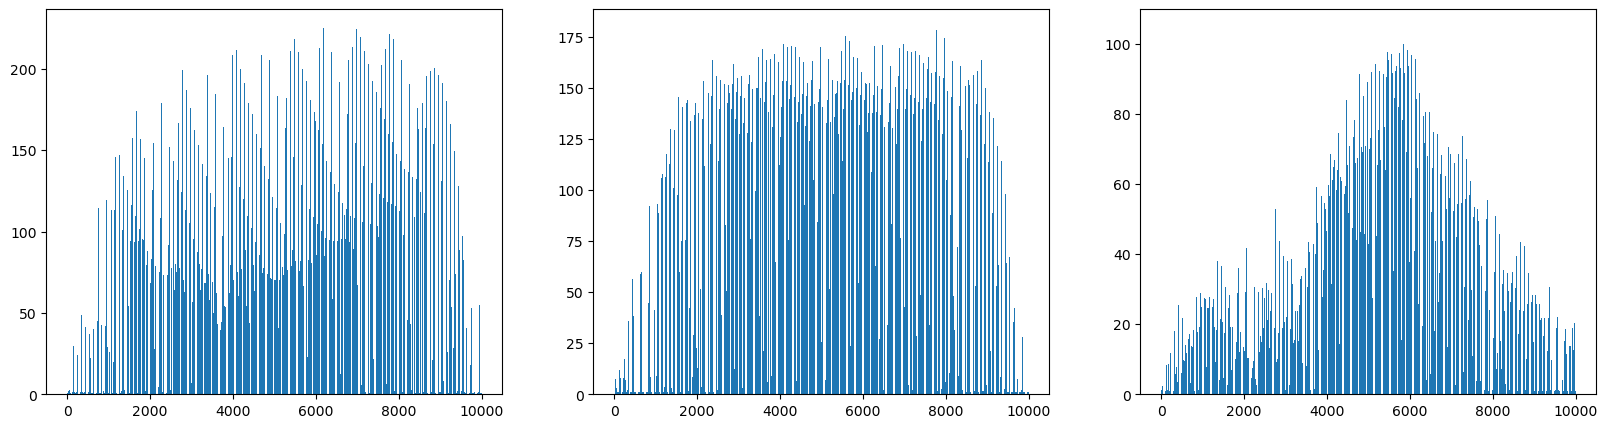

In [29]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()

bar() : 막대 그래프

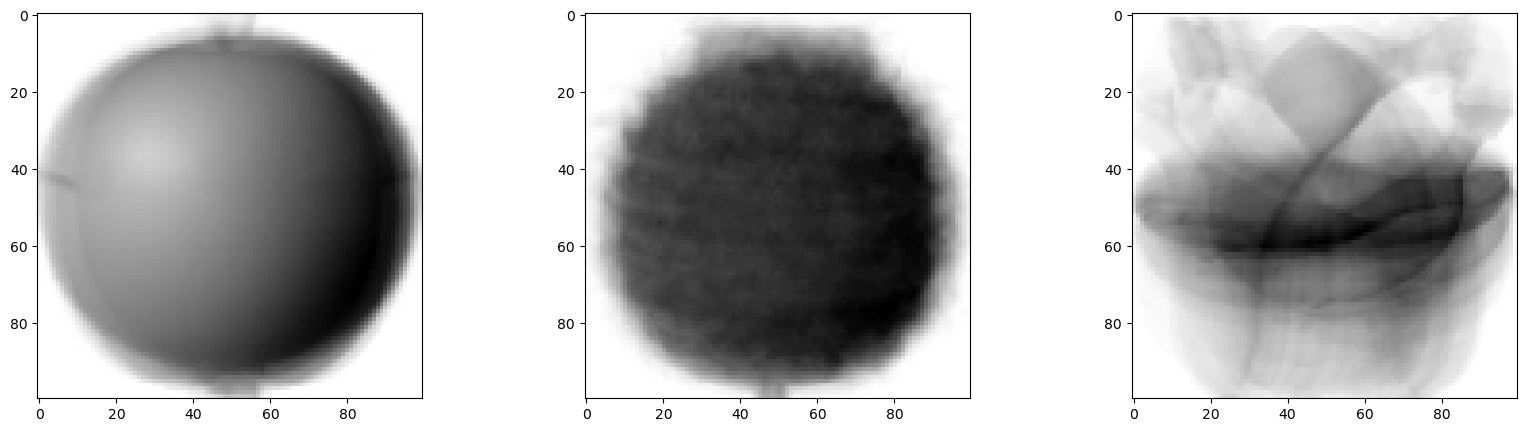

In [30]:
apple_mean = apple.mean(axis=0).reshape(100,100)
pineapple_mean = pineapple.mean(axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

막대 그래프를 100*100 이미지로 출력하여 비교

In [31]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


## 각 과일 이미지와 사과 평균 이미지가 얼마나 차이나는지 수치로 표현

abs() : 절댓값 계산 함수

fruits - apple_mean : 각 이미지의 픽셀에서 평균 사과 이미지의 픽셀 값을 뺌 -> **사과와의 편차**를 구함
abs_mean = np.mean(abs_diff, axis=(1,2)) : 이미지 전체가 평균적으로 얼마나 다른지 한 숫자로 표현
300개 이미지가 있으니까 총 300개 숫자가 생김

결과.shape : (300,)

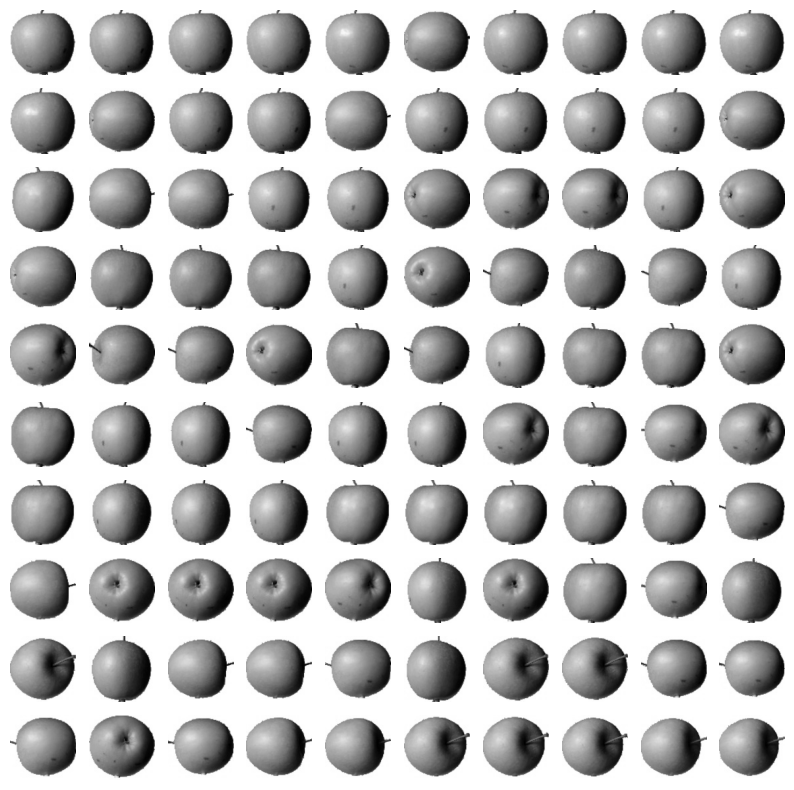

In [32]:
apple_index = np.argsort(abs_mean)[:100]
apple_index = apple_index.reshape(10, 10)
fig, axs= plt.subplots(10,10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i,j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

np.argsort() : 값이 작은 순서대로 정렬했을 때의 인덱스 반환
abs_mean이 작을수록 사과 평균 이미지와 더 비슷하다

apple_index = apple_index.reshape(10, 10) -> 100개의 인덱스를 10 * 10 형태로 바꿈, 시각화 할 때 axs[i, j]로 접근하기 쉬움

axs[i, j] : i행 j열의 그림칸에 접근
axis('off') : 축 눈금, 테두리 안 보이게